<a href="https://colab.research.google.com/github/Bahaakhalled/Data-Science-Salaries-EDA/blob/main/data_science_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [115]:
my_file = Path("ds_salaries.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Data-Science-Salaries-EDA/main/ds_salaries.csv'

In [116]:
ds_salaries=pd.read_csv('ds_salaries.csv')
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [117]:
ds_salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f338fcb50>,
      dtype=object)

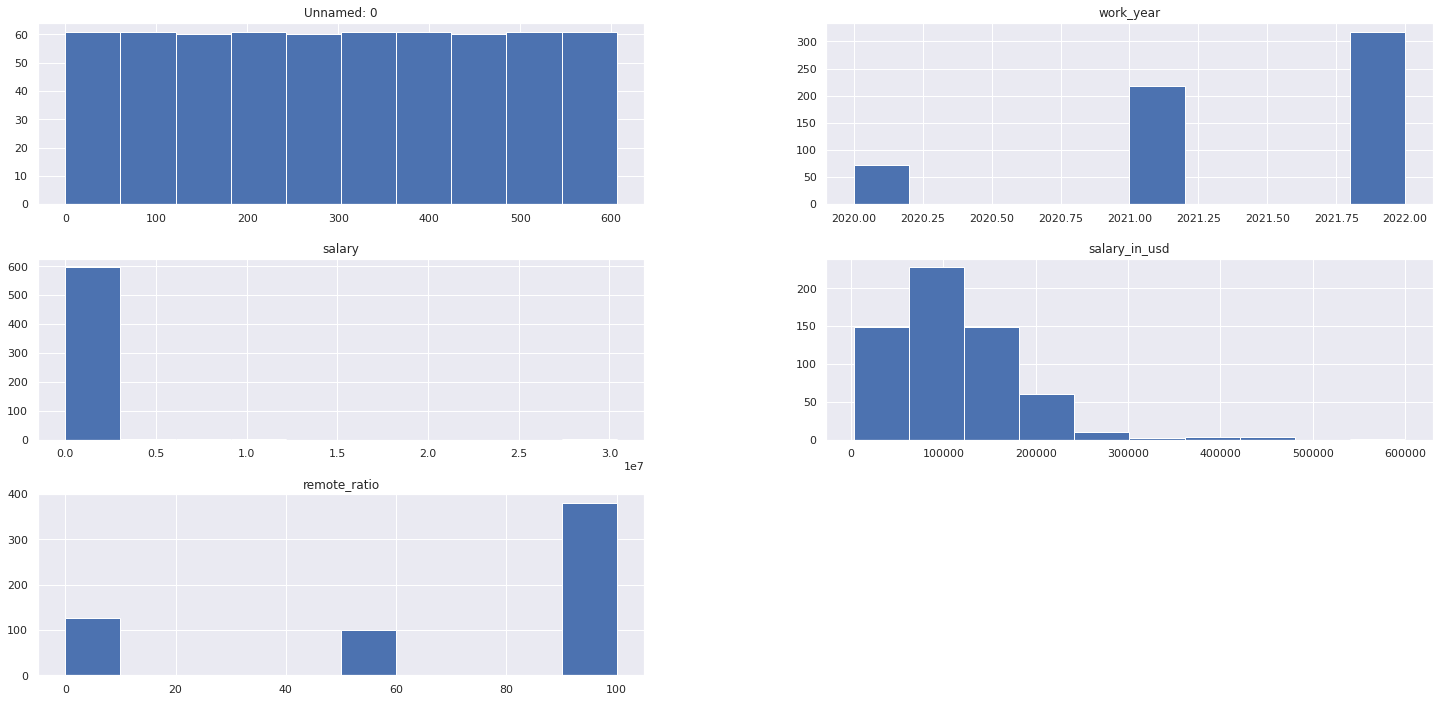

In [118]:
ds_salaries.hist(figsize=(25,12))

In [119]:
dsc=ds_salaries.copy()
dsc=dsc.drop('Unnamed: 0',axis=1)

[Text(0.5, 1.0, 'Yearly Salary based on experience level\n')]

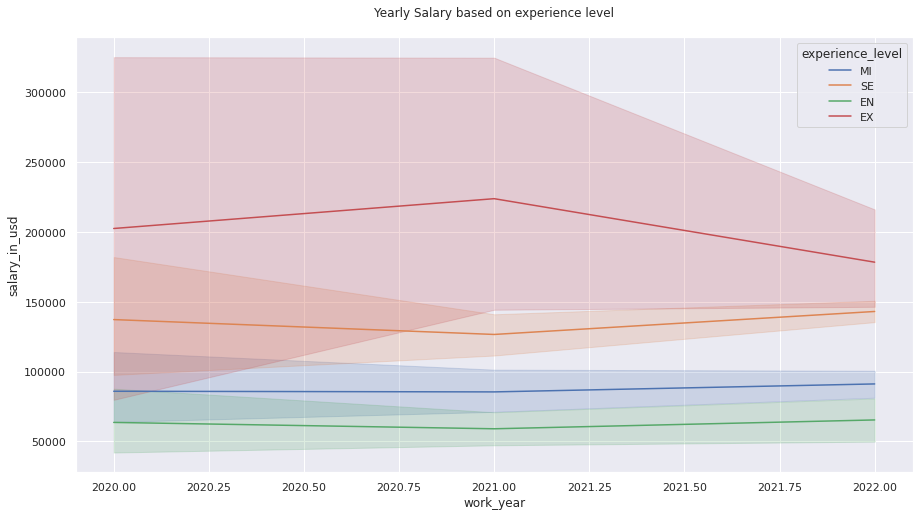

In [120]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data = dsc,x="work_year",y="salary_in_usd",hue = "experience_level").set(title='Yearly Salary based on experience level\n')

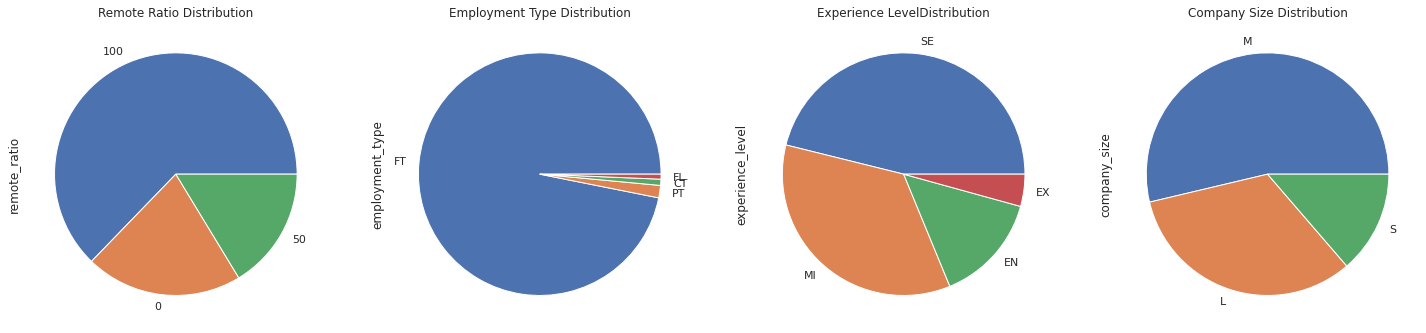

In [121]:
figure, axis = plt.subplots(1, 4,figsize=(25,12))

axis[0].set_title('Remote Ratio Distribution')
dsc.remote_ratio.value_counts().plot.pie(ax=axis[0])

axis[1].set_title('Employment Type Distribution')
dsc.employment_type.value_counts().plot.pie(ax=axis[1])

axis[2].set_title('Experience LevelDistribution')
dsc.experience_level.value_counts().plot.pie(ax=axis[2])

axis[3].set_title('Company Size Distribution')
dsc.company_size.value_counts().plot.pie(ax=axis[3])

do company size differ with how remote

if we took same size as ex in all exp level and compared remote ratio to find which exp level gets more remotency|

Text(0.5, 1.0, 'Salary Average based on Company Location')

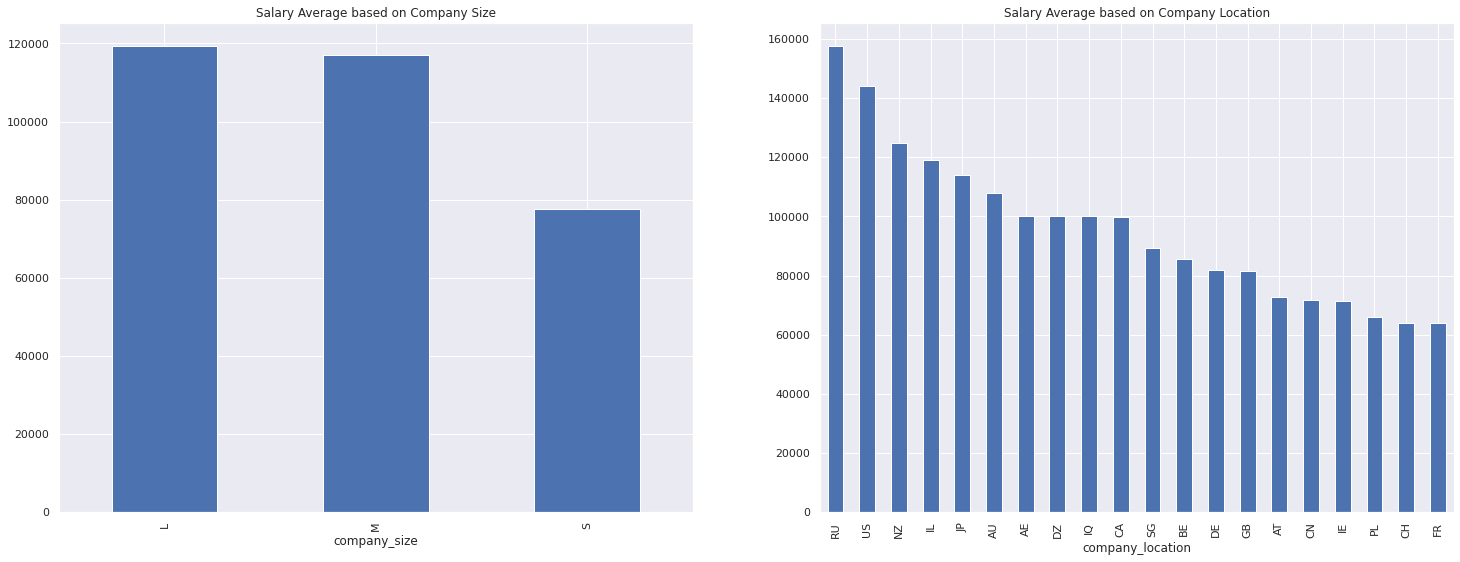

In [122]:
figure, axis = plt.subplots(1, 2,figsize=(25,9))

dsc.groupby('company_size').salary_in_usd.mean().plot(kind='bar',ax=axis[0])
axis[0].set_title('Salary Average based on Company Size')


dsc.groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(20).plot(kind='bar',ax=axis[1])
axis[1].set_title('Salary Average based on Company Location')


In [123]:
dsc.groupby('job_title').salary_in_usd.agg(['mean','count']).sort_values(by=['mean','count'],ascending=False).head(7)

,mean,count
job_title,,
Data Analytics Lead,405000.000000,1
Principal Data Engineer,328333.333333,3
Financial Data Analyst,275000.000000,2
Principal Data Scientist,215242.428571,7
Director of Data Science,195074.000000,7
Data Architect,177873.909091,11
Applied Data Scientist,175655.000000,5


In [124]:
dsc.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [125]:
dsc.company_location.value_counts().head(15)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
Name: company_location, dtype: int64

Most of the Data are from US Jobs

Text(0.5, 1.0, 'Small Company Locations')

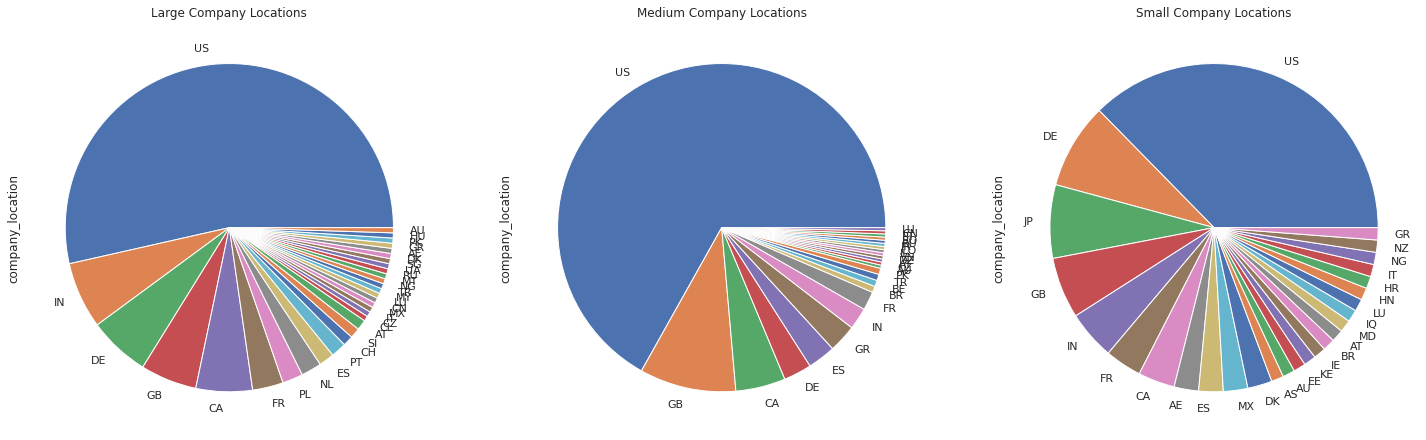

In [126]:
figure, axis = plt.subplots(1, 3,figsize=(25,12))

dsc.loc[dsc.company_size=='L'].company_location.value_counts().plot.pie(ax=axis[0])
axis[0].set_title('Large Company Locations')

dsc.loc[dsc.company_size=='M'].company_location.value_counts().plot.pie(ax=axis[1])
axis[1].set_title('Medium Company Locations')

dsc.loc[dsc.company_size=='S'].company_location.value_counts().plot.pie(ax=axis[2])
axis[2].set_title('Small Company Locations')


In [127]:
dsc.groupby('job_title').work_year.count().sort_values(ascending=False).head(10)

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Director of Data Science        7
Name: work_year, dtype: int64

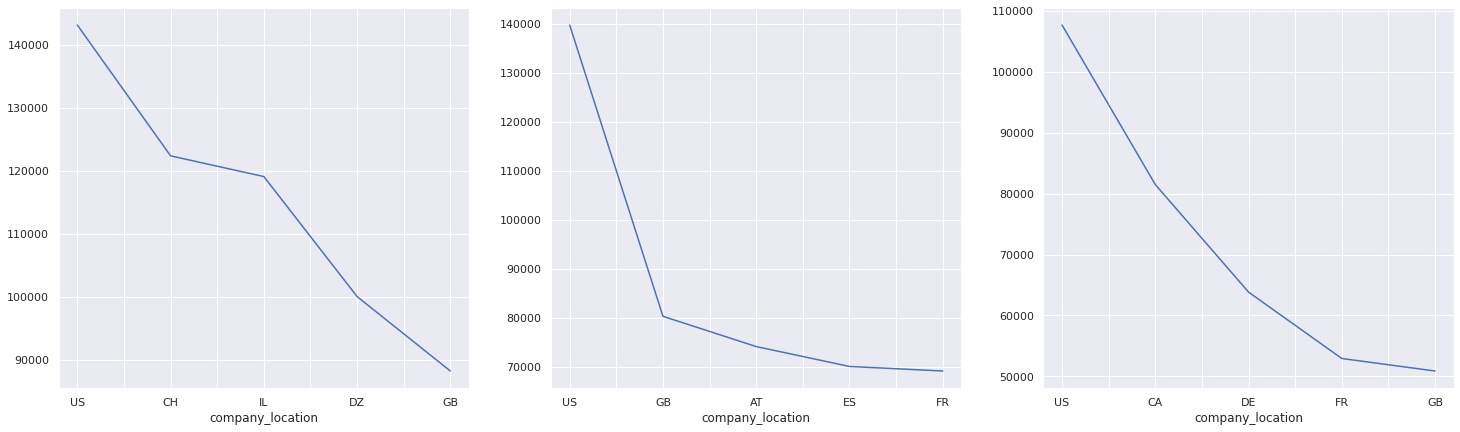

In [128]:
figure, axis = plt.subplots(1, 3,figsize=(25,7))

dsc.loc[dsc['job_title']=='Data Scientist'].groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(5).plot(ax=axis[0])

dsc.loc[dsc['job_title']=='Data Engineer'].groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(5).plot(ax=axis[1])

dsc.loc[dsc['job_title']=='Data Analyst'].groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(5).plot(ax=axis[2])

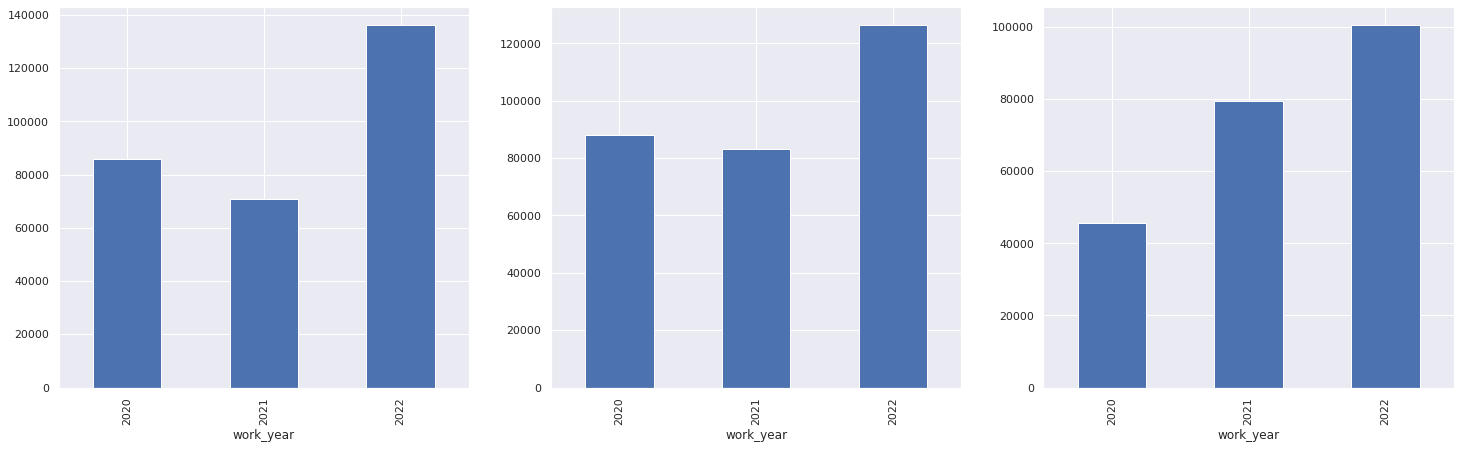

In [129]:
figure, axis = plt.subplots(1, 3,figsize=(25,7))

dsc.loc[dsc['job_title']=='Data Scientist'].groupby('work_year').salary_in_usd.mean().plot(kind='bar',ax=axis[0])

dsc.loc[dsc['job_title']=='Data Engineer'].groupby('work_year').salary_in_usd.mean().plot(kind='bar',ax=axis[1])

dsc.loc[dsc['job_title']=='Data Analyst'].groupby('work_year').salary_in_usd.mean().plot(kind='bar',ax=axis[2])

In [130]:
dsc.groupby('experience_level').sum()

,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,177849,23286776,5424612,6150
EX,52557,11103875,5184193,2050
MI,430532,102371568,18743160,13600
SE,566055,59905819,38812842,21250
